In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng()


In [2]:

# df1 = pd.read_csv("../results/fbs/ab-main-main-2022-09-21T16:10:12+02:00/v1.csv")
# df2 = pd.read_csv("../results/fbs/ab-main-main-2022-09-21T16:10:12+02:00/v2.csv")

df1 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v1.csv")
df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v2.csv")
df = pd.concat([df1, df2])

/var/folders/yy/bm360zrn0gjgb0sncr1s3_v80000gn/T/ipykernel_58716/177261900.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("../results/fbs/ab-main-perf-issue-request-id-2022-09-21T16:51:43+02:00/v2.csv")


In [3]:
df.head(n=30)

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,iter,method,name,scenario,status,url,extra_tags
0,http_reqs,1663771994,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
1,http_req_duration,1663771994,21.909651,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
2,http_req_blocked,1663771994,0.357819,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
3,http_req_connecting,1663771994,0.269754,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
4,http_req_tls_handshaking,1663771994,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
5,http_req_sending,1663771994,0.119915,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
6,http_req_waiting,1663771994,21.675035,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
7,http_req_receiving,1663771994,0.114701,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
8,http_req_failed,1663771994,0.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchFlights,200.0,http://10.132.0.28:3000/destinations,version=v1
9,http_reqs,1663771994,1.000000,NaN,NaN,NaN,True,0.0,GET,${}/destinations,searchAndBookFlight,200.0,http://10.132.0.28:3000/destinations,version=v1


In [4]:
df_req_durations = df[df["metric_name"] == "http_req_duration"].groupby(['timestamp', 'extra_tags']).agg({'metric_value': 'median', 'status': 'count'}).reset_index()
df_req_durations.head(n=10)

,timestamp,extra_tags,metric_value,status
0,1663771994,version=v1,71.384299,107
1,1663771994,version=v2,259.175647,86
2,1663771995,version=v1,61.671231,170
3,1663771995,version=v2,198.012279,99
4,1663771996,version=v1,48.731676,184
5,1663771996,version=v2,146.785551,128
6,1663771997,version=v1,43.551553,175
7,1663771997,version=v2,189.220267,121
8,1663771998,version=v1,40.408600,183
9,1663771998,version=v2,177.164702,114


In [5]:
# df_grouped = df.groupby(['index', 'version']).agg({'request_time_median': 'median', 'request_count': 'sum'}).reset_index()
# df_grouped

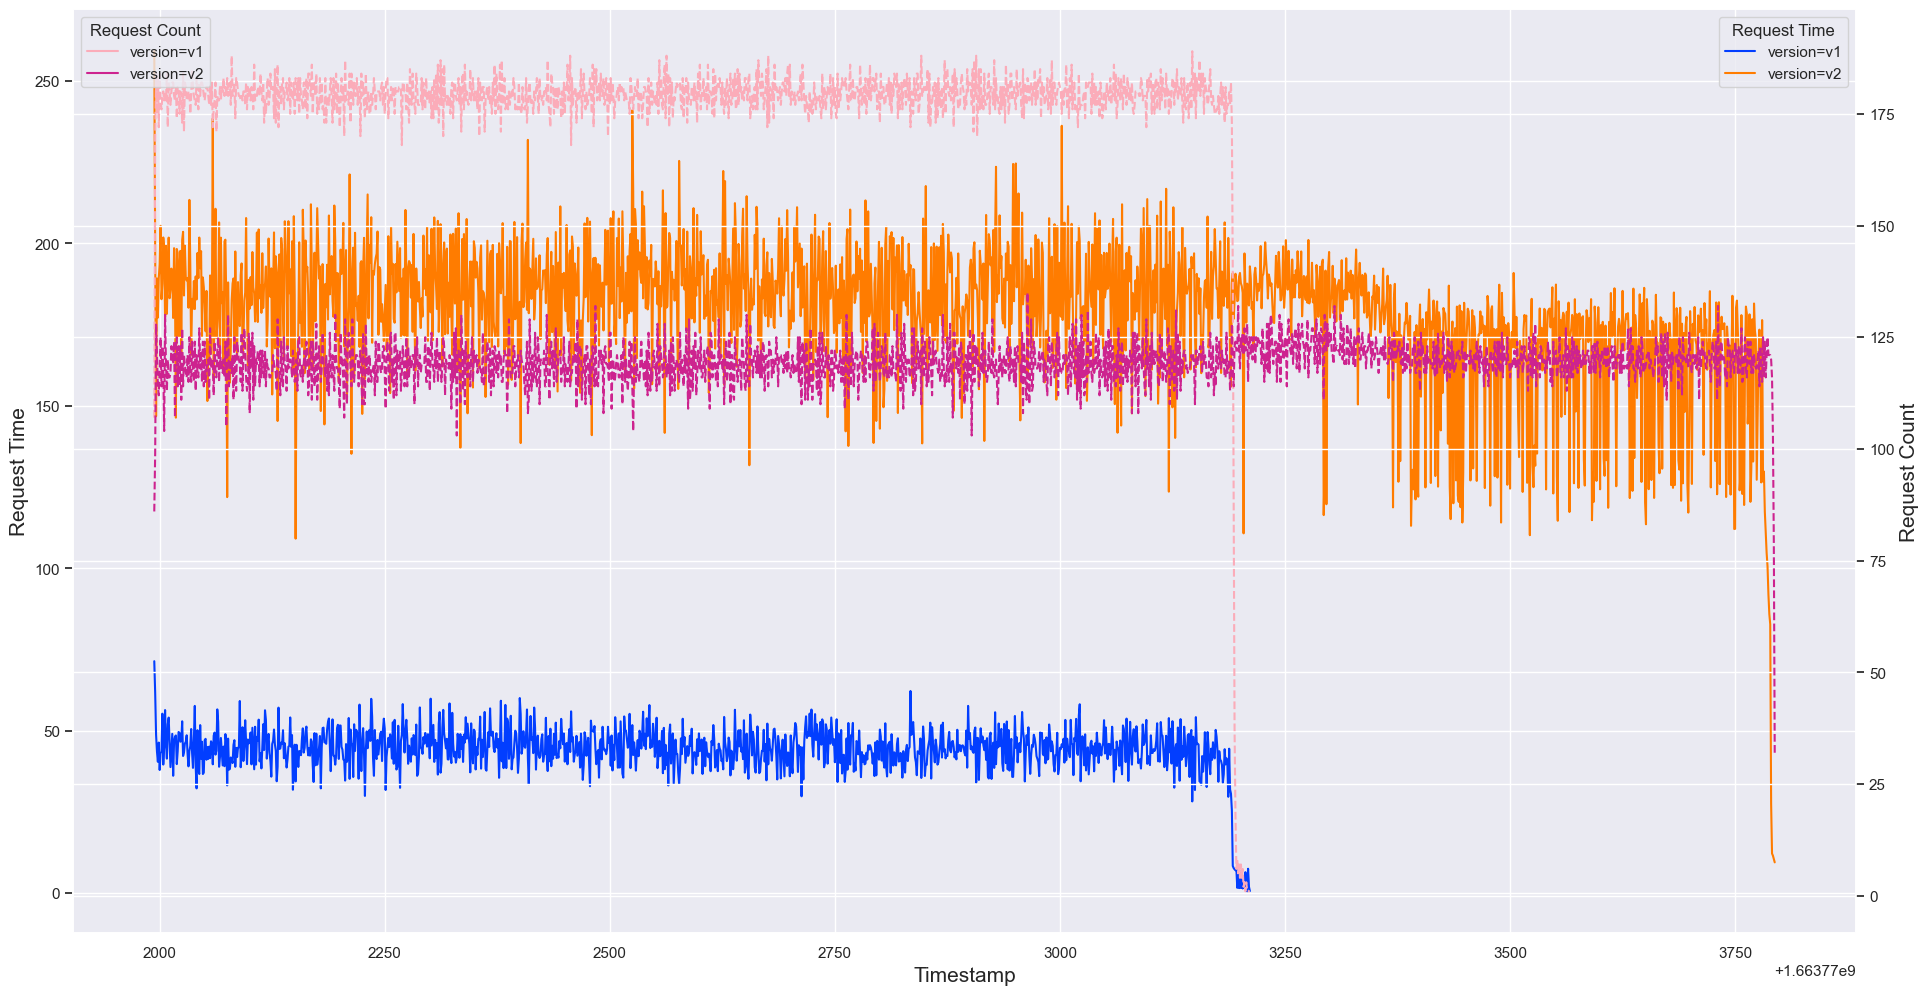

In [7]:

paletteTime = sns.color_palette("bright", 2)
paletteCount = sns.color_palette("RdPu", 2)

sns.set(rc={'figure.figsize':(23,12)})
g = sns.lineplot(data = df_req_durations, x='timestamp', y='metric_value', hue='extra_tags', palette=paletteTime)
g.set_xlabel("Timestamp", fontsize = 15)
g.set_ylabel("Request Time", fontsize = 15)
# g.set_ylim([0, 8500])
g.legend(title="Request Time")
ax2 = g.twinx()
ax2.set_ylabel("Request Count", fontsize = 15)
#ax2.set_ylim([0, 2000])
g2 = sns.lineplot(data = df_req_durations, x='timestamp', y='status', hue='extra_tags', ax=ax2, palette=paletteCount, linestyle="--")
g2.legend(title="Request Count", loc = 'upper left')

In [12]:
# use index
df_filtered = df_grouped[df_grouped['request_count'] > 500]
df_filtered

,index,version,request_time_median,request_count
12,6,v1,23.90,755
13,6,v2,20.45,782
14,7,v1,395.55,1983
15,7,v2,528.65,1875
16,8,v1,1141.65,1952
...,...,...,...,...
251,125,v2,6569.80,1366
252,126,v1,6439.70,1411
253,126,v2,7485.30,686
254,127,v1,4902.05,1686


In [13]:
measurementIndexesSize = df_filtered['index'].max() - df_filtered['index'].min()
measurementIndexesSize

121

In [14]:
def bootstrap(perfRuntimes1: pd.DataFrame, perfRuntimes2: pd.DataFrame):
  numberOfSamples = 10000
  allRuntimes1 = perfRuntimes1['request_time_median'].to_numpy()
  allRuntimes2 = perfRuntimes2['request_time_median'].to_numpy()
  currentMeasurementIndexes = rng.choice(measurementIndexesSize, size=(measurementIndexesSize, numberOfSamples))

  # Bulk selection
  tmp1 = allRuntimes1[currentMeasurementIndexes]
  tmp1 = np.stack(tmp1, axis=1)
  tmp2 = allRuntimes2[currentMeasurementIndexes]
  tmp2 = np.stack(tmp2, axis=1)

  # Get median for both lists
  med1 = np.median(tmp1, axis=1)
  med2 = np.median(tmp2, axis=1)
  R = med2/med1
  R.sort()

  CIsmall = 1 # 99% confidence interval
  small = int((numberOfSamples * CIsmall) / 100 / 2)
  if small == 0: small = 1
  minSmall = R[small-1]
  minSmall = (minSmall - 1) * 100
  maxSmall = R[numberOfSamples-small-1]
  maxSmall = (maxSmall - 1) * 100
  instability = maxSmall - minSmall
  return minSmall, maxSmall, instability

In [15]:
runtimes1 = df_filtered[df_filtered["version"] == 'v1']
runtimes2 = df_filtered[df_filtered["version"] == 'v2']
median1 = runtimes1['request_time_median'].median()
median2 = runtimes2['request_time_median'].median()
change = ((median2/median1) - 1) * 100
minci, maxci, instability = bootstrap(runtimes1, runtimes2)
assert maxci >= change
assert change >= minci
print(f"performance change: {change:.2f}% [{minci:.2f} - {maxci:.2f}] ({instability:.2f}%)")

performance change: 3.02% [-1.90 - 8.31] (10.21%)
